In [1]:
sys.path.append("../..")
from thesis.utils.env_checker import RewardCheck
from thesis.envs.matrix import Matrix
from thesis.envs.part_variants import MatrixPart
from thesis.envs.behaviors import OnlyStandBehavior

In [2]:
# from thesis.utils.utils import setup_ray
# path = "D:/Master/Masterarbeit/thesis"
# setup_ray(path = path, unidirectional = False, seed=69)

In [5]:
env = Matrix(
    model_path = "../../envs/Matrix.zip",
    startport = 51141,
    max_seconds = 60*60,

    fleetsize = 8,
    max_fleetsize = 30,    
    pseudo_routing = False,
    pseudo_dispatcher = True,
    pseudo_dispatcher_clever=False,
    #pseudo_dispatcher_distance = 0.2,
    routing_agent_death= False,
    death_on_target = False,
    #transform_dispatching_partobs=True,
    direction_reward = -0.1,
    sim_config = dict(
        dispatch = True,
        routing_ma = True,
        dispatching_ma = True,
        reward_reached_target = 10,
        #reward_reached_target_by_time = True, 
        reward_wrong_target = -1,
        reward_removed_for_block = -5, 
        reward_target_distance = -1,
        reward_invalid= -0.1,
        reward_duration = -0.5,
        block_timeout = 120,
        reward_accepted_in_station = 1,
        reward_declined_in_station = -1,
        routing_interval = 2,
        dispatching_interval=360,
        io_quote = 0.99  ,
        availability = 0.95,
        mttr = 5,
    )
)

c:\Users\Wegma\.conda\envs\thesis3_9\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_38188__vx6p22j)
  warn(f"Unzipping to temporary directory ({tmp_dir})")


In [6]:
chk = RewardCheck(env)

AGENT 0 --- STEP 295 --- REWARD -0.04294586295960053


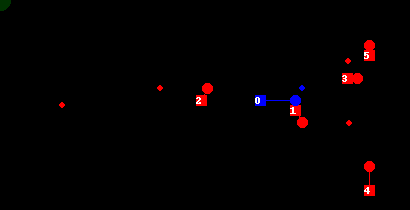

KeyboardInterrupt: 

In [7]:
chk.run(1, 42, manual_agents=["0"])

In [5]:
# env.agent_behaviors["1000"].part_obs_to_dict(env.run.get_observation().obs[0][14:], "matrix")

In [6]:
#MatrixPart().translate(env.agent_behaviors["1000"].part_obs_to_dict(env.run.get_observation().obs[0][14:], "matrix"))

In [5]:
env.statistics

{'block': 4.0,
 'targetReached': 319.0,
 'wrongTarget': 65.0,
 'jobDone': 0.0,
 'newPart': 9.0,
 'dispatch': 362.0,
 'taken_invalid': 3421.0,
 '_jobdur_hgeo1': 180.0,
 '_jobnum_hgeo1': 6.0,
 '_jobdur_vgeo1': 90.0,
 '_jobnum_vgeo1': 3.0,
 '_blocksec_agv2': 208.5,
 'liveLock': 31.0,
 '_blocksec_agv3': 92.0,
 '_blocksec_agv6': 46.5,
 '_njobs_agv6': 8.0,
 '_blocksec_agv4': 201.5,
 '_njobs_agv5': 3.0,
 '_blocksec_agv5': 107.0,
 '_blocksec_agv0': 116.5,
 '_jobdur_wps_3': 17.5,
 '_jobnum_wps_3': 1.0,
 '_njobs_agv3': 3.0,
 '_jobdur_wps_1': 52.5,
 '_jobnum_wps_1': 3.0,
 '_jobdur_hsn1_2': 49.5,
 '_jobnum_hsn1_2': 2.0,
 '_blocksec_agv7': 79.5,
 '_jobdur_hsn1_1': 108.625,
 '_jobnum_hsn1_1': 5.0,
 '_jobdur_vgeo2': 60.0,
 '_jobnum_vgeo2': 2.0,
 '_blocksec_agv1': 22.5,
 '_jobdur_wps_2': 82.25,
 '_jobnum_wps_2': 4.0,
 '_njobs_agv1': 4.0,
 '_jobdur_hsn2_1': 11.375,
 '_jobnum_hsn2_1': 1.0,
 '_jobdur_impact': 37.5,
 '_jobnum_impact': 1.0,
 '_njobs_agv7': 6.0,
 '_njobs_agv4': 3.0,
 '_njobs_agv0': 6.0,
 '_

In [7]:
env.statistics

{'block': 53.0,
 'targetReached': 275.0,
 'wrongTarget': 44.0,
 'jobDone': 0.0,
 'newPart': 9.0,
 'dispatch': 316.0,
 'taken_invalid': 1950.0,
 '_jobdur_hgeo1': 150.0,
 '_jobnum_hgeo1': 5.0,
 '_jobdur_vgeo1': 120.0,
 '_jobnum_vgeo1': 4.0,
 '_blocksec_agv5': 87.5,
 '_blocksec_agv7': 407.5,
 '_blocksec_agv3': 210.99999999999997,
 '_blocksec_agv1': 38.5,
 '_blocksec_agv6': 257.0,
 'liveLock': 28.0,
 '_blocksec_agv4': 301.5,
 '_blocksec_agv2': 430.0,
 '_blocksec_agv0': 646.5,
 '_njobs_agv4': 2.0,
 '_jobdur_wps_3': 35.0,
 '_jobnum_wps_3': 2.0,
 '_jobdur_hsn1_2': 49.5,
 '_jobnum_hsn1_2': 2.0,
 '_njobs_agv6': 4.0,
 '_jobdur_hsn1_1': 99.0,
 '_jobnum_hsn1_1': 4.0,
 '_jobdur_hgeo2': 30.0,
 '_jobnum_hgeo2': 1.0,
 '_njobs_agv7': 2.0,
 '_njobs_agv3': 4.0,
 '_jobdur_vgeo2': 30.0,
 '_jobnum_vgeo2': 1.0,
 '_jobdur_wps_1': 17.5,
 '_jobnum_wps_1': 1.0,
 '_njobs_agv5': 2.0,
 '_jobdur_hsn2_2': 11.375,
 '_jobnum_hsn2_2': 1.0,
 '_njobs_agv2': 1.0,
 '_jobdur_hsn2_1': 11.375,
 '_jobnum_hsn2_1': 1.0,
 '_jobdur

In [9]:
chk.replay("0")

AssertionError: 

In [ ]:
env.observations["1000"]

OrderedDict([('agvs',
              array([[1.        , 1.        , 0.38461538, ..., 0.        , 0.        ,
                      0.        ],
                     [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                      0.        ],
                     [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                      0.        ],
                     ...,
                     [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                      0.        ],
                     [1.        , 1.        , 0.65088757, ..., 0.        , 0.        ,
                      0.        ],
                     [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                      0.        ]])),
             ('stat',
              array([[1.        , 0.97614679, 1.        , ..., 0.        , 0.        ,
                      0.        ],
                     [1.        , 0.81100917, 1.        , ..., 0.        

In [ ]:
import numpy as np
np.array(["Hi",2,3])[[True, False, True]]

array(['Hi', '3'], dtype='<U11')

In [ ]:
vgeo1
vgeo2
vgeo3
vgeo4
vgeo5
vgeo6
hgeo1
hgeo2
hgeo3
hgeo4
hgeo5

In [ ]:
env.agent_hive.stations

OrderedDict([(4, (0.15384615384615385, 0.5229357798165137)),
             (9, (0.15384615384615385, 0.3486238532110092)),
             (14, (0.2875739644970414, 0.6146788990825688)),
             (19, (0.4, 0.44036697247706424)),
             (24, (0.5183431952662721, 0.6146788990825688)),
             (29, (0.6366863905325444, 0.44036697247706424)),
             (34, (0.7550295857988165, 0.6146788990825688)),
             (39, (0.8733727810650888, 0.6146788990825688)),
             (40, (0.7550295857988165, 0.44036697247706424)),
             (41, (0.6366863905325444, 0.6146788990825688)),
             (42, (0.5183431952662721, 0.44036697247706424)),
             (43, (0.4, 0.6146788990825688)),
             (44, (0.2875739644970414, 0.44036697247706424)),
             (49, (0.15384615384615385, 0.7064220183486238)),
             (54, (0.15384615384615385, 0.8899082568807339)),
             (59, (0.15384615384615385, 0.1559633027522936)),
             (76, (1.0, 0.08256880733944955)),

AGENT 1000 --- STEP 1 --- ACTION [4, 4, 5, 2, 4, 4, 1, 5, 5, 3] --- REWARD -5.0


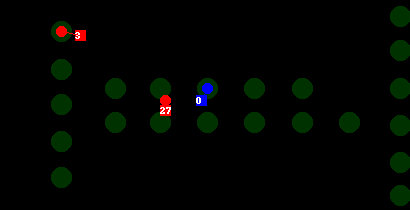

In [ ]:
chk.replay("1000")

In [ ]:
chk.plot("0")

KeyboardInterrupt: 

In [ ]:
chk.history["statistics"]

[{'block': 0.0,
  'targetReached': 152.0,
  'wrongTarget': 9.0,
  'jobDone': 0.0,
  'newPart': 5.0,
  'dispatch': 155.0,
  'taken_invalid': 498.0,
  '_jobdur_hgeo1': 60.0,
  '_jobnum_hgeo1': 2.0,
  '_jobdur_vgeo1': 90.0,
  '_jobnum_vgeo1': 3.0,
  '_njobs_agv2': 4.0,
  '_jobdur_hsn1_1': 236.5,
  '_jobnum_hsn1_1': 2.0,
  '_blocksec_agv1': 97.5,
  '_jobdur_wps_1': 217.0,
  '_jobnum_wps_1': 1.0,
  '_jobdur_hsn2_2': 130.0,
  '_jobnum_hsn2_2': 1.0,
  '_njobs_agv1': 3.0,
  '_jobdur_impact': 300.0,
  '_jobnum_impact': 2.0,
  '_njobs_agv0': 1.0},
 {'block': 0.0,
  'targetReached': 133.0,
  'wrongTarget': 5.0,
  'jobDone': 0.0,
  'newPart': 5.0,
  'dispatch': 137.0,
  'taken_invalid': 329.0,
  '_jobdur_hgeo1': 60.0,
  '_jobnum_hgeo1': 2.0,
  '_jobdur_vgeo1': 90.0,
  '_jobnum_vgeo1': 3.0,
  '_blocksec_agv1': 218.0,
  '_blocksec_agv0': 0.5,
  '_njobs_agv0': 6.0,
  '_njobs_agv2': 4.0,
  '_jobdur_hsn1_1': 137.5,
  '_jobnum_hsn1_1': 1.0,
  '_jobdur_hsn1_2': 198.0,
  '_jobnum_hsn1_2': 2.0,
  '_njobs_a

In [ ]:
[stat["block"] for stat in chk.history["statistics"]]

[0.0, 0.0, 0.0, 0.0, 0.0]